## Importing Libraries

In [2]:
# Data Processing
import numpy as np
import pandas as pd
from collections import Counter

# Importing tde
import tde

# Visualization
import matplotlib.pyplot as plt

# To generate the for loops
import glob
import os
from matplotlib import ticker

## Reading the Mice Data

In [3]:
# Import data
folder = "/Users/yoddmena/Downloads/Research/Telemetry_edited/"

files = glob.glob( folder + "Ex *.xlsx" ) 

dfs = []
min = []
#k = 0
for file in files:
    #k = k +1
    #if k > 2:
        #break
    df = pd.read_excel(file) # reading the excel file
    
    mice_min = df.iloc[:,0] #getting only the minutes
    mice_temp = df.iloc[:,3::2] # slicing the data for only temperature
    
    min.append(mice_min) # adding minutes into the list
    dfs.append(mice_temp) # adding the file into the list
  
     

In [9]:
len(min)
#len(dfs[4])

13

## Plotting Time Series

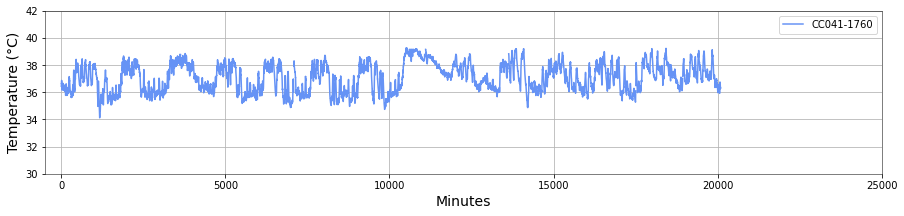

In [11]:
# PLOTTING EACH TIME SERIES
fig,ax = plt.subplots(figsize=(15,3))
fig.set_facecolor("white") # Changing the border to white

# Plotting each file's temperature vs. minutes
for i in range(len(min)):
    mice_min = min[i] # renaming the minutes to the current column
    mice_temp = dfs[i] # renaming the temperature to the current column
    x_axis = mice_min # defining the x axis
    
    # A for loop for the temperatures (extracting only the column of data frame)
    for j in range(mice_temp.shape[1]): 
        ax.cla() # clear axis for each individual mouse
        y_axis = mice_temp.iloc[:,j] # defining the y axis
        #names = mice_temp.columns[0] # extracting the names of the columns (mouse name)
        
        #temp_value = df_temp.iloc[:, i] # extract the temperature values for the current column
        mice_temp2 = mice_temp.iloc[:, j].to_frame() # converting temp list to data frame
    
        name = mice_temp2.columns[0] # get the column name for the current file
        names = name.split(" ")[0]
        
        # Plotting the time series
        ax.plot(x_axis, y_axis, label= names, color="#6693F5") # plotting the time series
        # Set linewidth for all sides of the spines
        linewidth = 0.5
        for spine in ax.spines.values():
            spine.set_linewidth(linewidth)
        
        grid_color = plt.get_cmap('Greys')(0.4)
        ax.grid(color=grid_color)
        
        ax.grid(True) # adding a grid
        ax.set_xlim(-500,25000,2000)
        ax.set_ylim(30,42,0.5)
        ax.set_xlabel("Minutes",fontsize=14) #x label
        ax.set_ylabel('Temperature (°C)',fontsize=14) #y label
        ax.legend() # name of the mouse
        suffix = str(i).zfill(4)
        
        #SAVING EACH PLOT
        filename = "Images/%s_TS.png"%names # saving the file as the name of the mouse
        fig.savefig(filename, bbox_inches='tight')